## Import Packages

In [ ]:
import numpy as np
import pandas as pd #To read csv file
import matplotlib.pyplot as plt
import seaborn as sns #To plot Histograms with Distribution curves
from matplotlib import axes #Organize feature sub-groups
#unsure
import scipy.stats as st

In [ ]:
df = pd.read_csv('Life Expectancy Data Cleaned.csv') #Read the clean data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2928 non-null   int64  
 1   Status                           2928 non-null   int64  
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   int64  
 4   infant deaths                    2928 non-null   int64  
 5   Alcohol                          2928 non-null   float64
 6   percentage expenditure           2928 non-null   float64
 7   Hepatitis B                      2928 non-null   int64  
 8   Measles                          2928 non-null   float64
 9    BMI                             2928 non-null   float64
 10  under-five deaths                2928 non-null   int64  
 11  Polio                            2928 non-null   float64
 12  Total expenditure   

## **Distribution Plotting** & **Comments**

#### Plotting helper function



```
# def plot_hist(feature, bin, ax):
```

A function to plot histograms with distribution curves for the **feature** passed as an argument. The number of **bins** is decided based on the data. Each subgroup of features are organized using **ax** for each group of features we use subplot to organize them together.

As a rule of thumb when using subplots, the size will be (5\*columns,3.3\*rows).

Number of rows are 3 max and colums will depend on the number of features

In [ ]:
def plot_hist(feature, bin, ax):
  """
  Plot histogram for the given feature
  """
  sns.histplot(df[feature], bins=bin, kde=True, ax=ax) #kde to plot distribution curve
  ax.set_title(f'{feature} Distribution') #Label each plot



### **Health & Mortality Indicators**

#### Histogram Plot

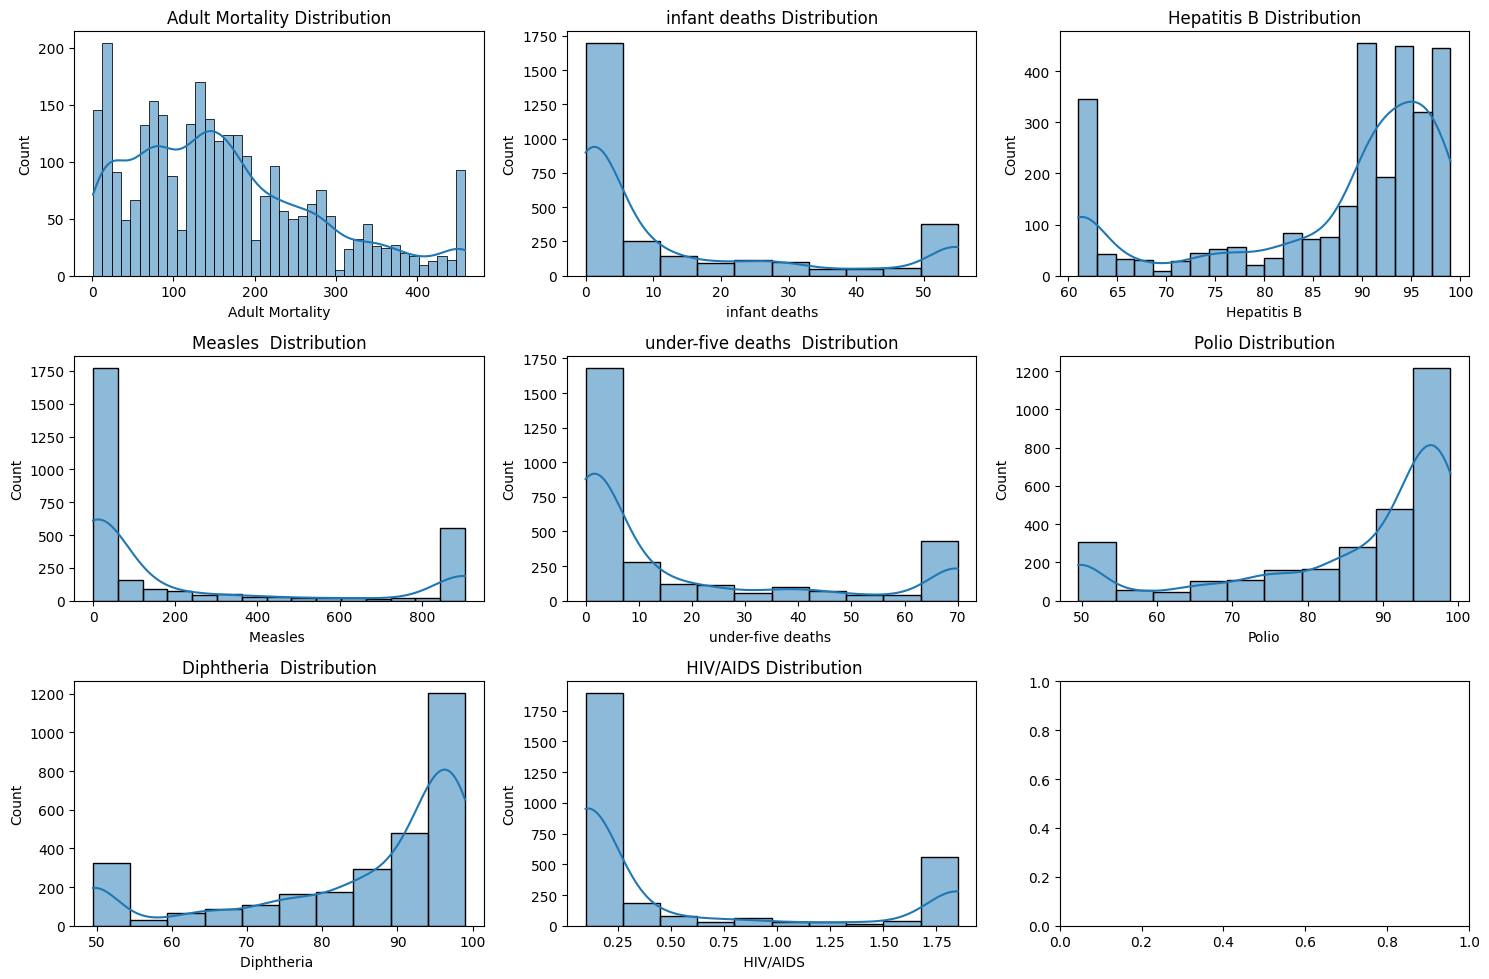

In [ ]:
ro = 3 #number of rows in the subplot
col = 3 #number of columns in the subplot
fig, axes = plt.subplots(ro, col, figsize=(5*col, 3.3*ro))

plot_hist('Adult Mortality', 40, axes[0,0])
plot_hist('infant deaths', 10, axes[0,1])
plot_hist('Hepatitis B', 20, axes[0,2])

plot_hist('Measles ', 15, axes[1,0])
plot_hist('under-five deaths ', 10, axes[1,1])
plot_hist('Polio', 10, axes[1,2])

plot_hist('Diphtheria ', 10, axes[2,0])
plot_hist(' HIV/AIDS', 10, axes[2,1])


plt.tight_layout() #to avoid titles overlapping
plt.show()


#### Distribution Types Comments

**Adult Mortality** Left skewed distribution, with multiple similar peaks

**Infant Deaths** Skewed biomodal, predominantly left-skewed but with a secondary mode on the right.

**Hepatitis B** Skewed biomodal, predominantly right-skewed but with a secondary mode on the left.

**Measles** Heavy tailed distribution

**Under-five deaths** Skewed biomodal, predominantly left-skewed but with a secondary mode on the right.

**Polio** Skewed biomodal, predominantly right-skewed but with a secondary mode on the left.

**Diphtheria** Skewed biomodal, predominantly right-skewed but with a secondary mode on the left.

**HIV/AIDS** Skewed biomodal, predominantly left-skewed but with a secondary mode on the right.



### **Lifestyle & Physical Health**

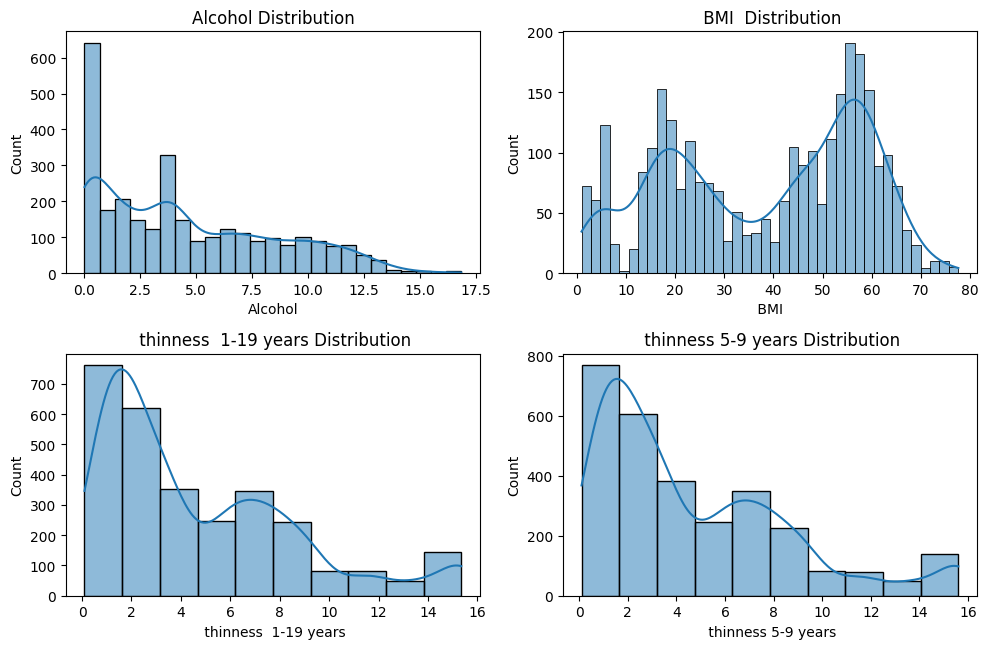

In [ ]:
ro = 2 #number of rows in the subplot
col = 2 #number of columns in the subplot

fig, axes = plt.subplots(ro, col, figsize=(5*col, 3.3*ro))

plot_hist('Alcohol', 25, axes[0,0])
plot_hist(' BMI ', 40, axes[0,1])

plot_hist(' thinness  1-19 years', 10, axes[1,0])
plot_hist(' thinness 5-9 years', 10, axes[1,1])


plt.tight_layout() #to avoid titles overlapping
plt.show()


#### Distribution Types comments
**Alcohol** Biomodal skewed data, shows 2 left skewed populations overlapping

**BMI** Biomodal distribution, likely 2 normal distributions overlapping (not known what seperates these 2 populations)

**Thinness 1-19 years** Biomodal left skewed distribution, 2 left skewed populations overlapping

**Thinness 5-9 years** Biomodal left skewed distribution, 2 left skewed populations overlapping


### **Economic Indicators**

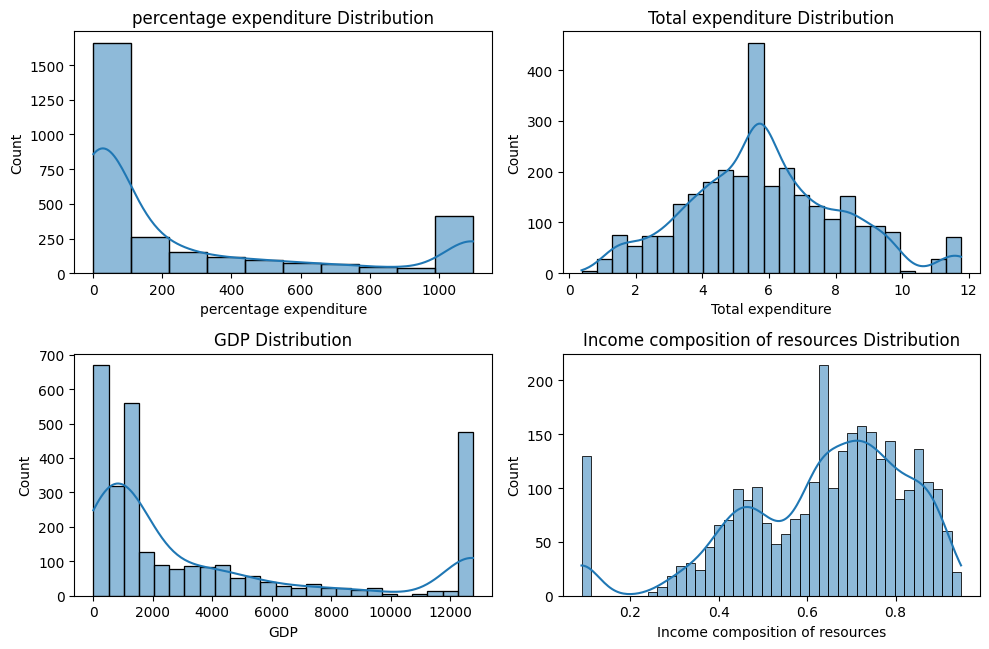

In [ ]:
ro = 2 #number of rows in the subplot
col = 2 #number of columns in the subplot

fig, axes = plt.subplots(ro, col, figsize=(5*col, 3.3*ro))

plot_hist('percentage expenditure', 10, axes[0,0])
plot_hist('Total expenditure', 25, axes[0,1])

plot_hist('GDP', 25, axes[1,0])
plot_hist('Income composition of resources', 40, axes[1,1])


plt.tight_layout() #to avoid titles overlapping
plt.show()

#### Distribution Types Comments

**Percentage Expenditure** Skewed biomodal, predominantly left-skewed but with a secondary mode on the right.

**Total Expenditure** Normal distribution, with a right gap followed with a peak suggesting high expenditure on health, perhaps by a wealthy country or it could have happend during health crises

**GDP** Skewed biomodal, predominantly left-skewed but with a secondary mode on the right. Shows most countires have low GDP with a few being highly productive

**Income composition of resources** Biomdal distribution, 2 peaks of overlapping populations with the right peak being higher reprsenting a dominant sub-group located near the maximum


### **Education & Social Development**

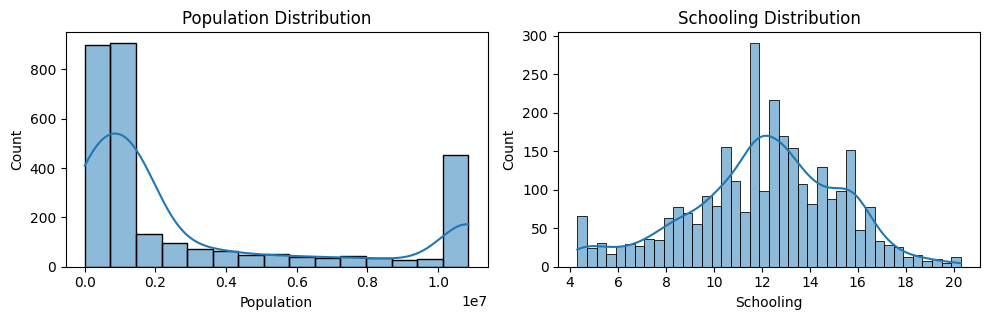

In [ ]:
ro = 1 #number of rows in the subplot
col = 2 #number of columns in the subplot

fig, axes = plt.subplots(ro, col, figsize=(5*col, 3.3*ro))

plot_hist('Population', 15, axes[0])
plot_hist('Schooling', 40, axes[1])


plt.tight_layout() #to avoid titles overlapping
plt.show()

#### Distribution Types Comments

**Population** Skewed Biomodal distribution, predominatly left skewed meaning most countries are small, with a right peak representing fewer very large countries. The fewest size being what is in between

**Schooling** Approximatly normal distribution, with a right shoulder (minor mode) suggesting that a few number of countries (on certain years) have higher-than-average education level, but isn't enought to create a seperate peak

### **Final Distribution Comment**

Most features, if not all, exhibit a mixture of distribution types, that is likely due to the fact the data is gathered from multiple countries through many years. Whch explains the repeated occurance of having multiple peaks which suggests that this data represent multiple overlapping populations, whether they are normal or skewed.

## **Normaility Testing**

#### Normaility testing helper function

In [ ]:
from scipy.stats import anderson

In [ ]:
print(anderson(df['Adult Mortality']))

AndersonResult(statistic=np.float64(45.05712704568714), critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(162.08743169398906), scale=np.float64(115.86668944268375))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


## Correlation Coefficient

First we create a function that calculates the correlation coefficient value, r, using the following formula:

$$r= \frac{Cov(X,Y)}{σ_x ⋅ σ_y}$$

which is expanded as:

$$
r= \frac
{Σ_{i=1}^n (x_i - \bar{x})  (y_i - \bar{y}) }
{\sqrt{Σ_{i=1}^n (x_i - \bar{x})^2} \cdot \sqrt{Σ_{i=1}^n (y_i - \bar{y})^2}}
$$

Where x is each predictor and y is the result "life expectency"

We will use the methods .mean() and .std(), so the final r formula is:

$$
r= \frac
{Σ_{i=1}^n (x_i - \bar{x})  (y_i - \bar{y}) }
{(n-1) \cdot σ_x \cdot σ_y}
$$


In [ ]:
#Start with the y σ & mean to avoid recalculations

mean_y = df['Life expectancy '].mean()
std_y = df['Life expectancy '].std()
n = len(df['Life expectancy ']) #number of samples

def corr(x):
  """
  A function to calculate the correlation coefficient r between
  the given feature and the result, life expectancy.
  """
  #for predictor x
  mean_x = df[x].mean() #x mean
  std_x = df[x].std()   # x standard deviation

  #For the numerator
  cov_xy = np.sum((df[x] - mean_x) * (df['Life expectancy '] - mean_y))

  #For the denominator
  std_xy = (n-1) * std_x * std_y

  #Final r value
  r = cov_xy / std_xy

  return r


In [ ]:
#Create a list of a predictors names
predictor_col = df.columns.drop(['Life expectancy ', 'Year' , 'Status' ])

#A table for the r values
corr_table = pd.DataFrame(index=predictor_col, columns=['r'])

#Populate the table
for col in predictor_col:
  r = corr(col)
  corr_table.loc[col] = r
  #print(f'The correlation coefficient for {col} is {r}')

#sort the r values
corr_table = corr_table.sort_values(by='r', ascending=False)


print(corr_table)

                                        r
Schooling                        0.752399
Income composition of resources   0.73549
Diphtheria                       0.570589
Polio                            0.564779
 BMI                             0.559755
GDP                              0.546017
percentage expenditure           0.488666
Alcohol                          0.391731
Hepatitis B                      0.275678
Total expenditure                0.214499
Population                      -0.083676
Measles                          -0.33654
 thinness 5-9 years             -0.506122
 thinness  1-19 years           -0.508493
infant deaths                   -0.566844
under-five deaths               -0.603891
Adult Mortality                 -0.691429
 HIV/AIDS                       -0.796719
